### 5-fold Cross Validation

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: Convergen

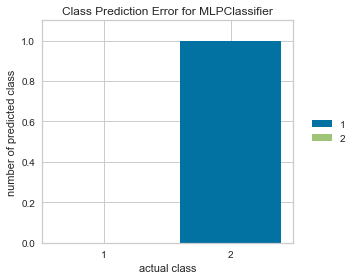

In [34]:
from math import floor
from statistics import mean
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Function to scale input vectors
def scale(scaler, input_vector):
    scaler.fit(input_vector)
    scaled_features = scaler.transform(input_vector)
    return scaled_features

# Function to calculate number of nodes in hidden layer of MLP
def calc_node_num(input_len, output_len):
    return floor(mean([input_len, output_len]))

# Function to construct params dictionary to pass to cross validation
def construct_params(node_num):
    return {'hidden_layer_sizes': [(node_num,)], 
            'activation': ['logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd']}

# Function to run 5-fold cross validation (with MLP) to determine optimal hyperparameters for MLP classifer
def cross_validation(x_features, y_labels, params):
    clf = GridSearchCV(MLPClassifier(), params, cv=3, # Fix this with actual dataset
                       scoring='f1')
    clf.fit(x_features, y_labels)
    return clf.best_params_

# Return model with given params
def get_model(params):
    return MLPClassifier(hidden_layer_sizes=params['hidden_layer_sizes'], 
                         activation=params['activation'], 
                         solver=params['solver'])

# Train model on entire training set
def train_model(model, x_vector, y_vector):
    model.fit(x_vector, y_vector)
    return model

# Steps for age and time period classifiers
# (0) Scale input/output data (?)
scaler = StandardScaler()
age_features = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
age_labels = [1, 2, 2, 1, 1, 2]
scaled_age_features = scale(scaler, age_features)
# print(scaled_age_features)

time_period_features = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10]]
time_period_labels = [1, 2, 1, 2, 1, 2]
scaled_time_period_features = scale(scaler, time_period_features)
# print(scaled_time_period_features)

# (1) Perform cross validation with all chosen parameters
age_node_num = calc_node_num(len(age_features[0]), len(age_labels))
age_params = construct_params(age_node_num)
best_age_params = cross_validation(scaled_age_features, age_labels, age_params)

tp_node_num = calc_node_num(len(time_period_features[0]), len(time_period_labels))
time_period_params = construct_params(tp_node_num)
best_tp_params = cross_validation(scaled_time_period_features, time_period_labels, time_period_params)

# (2) After determining optimal params based on accuracy, retrain model with those params
# age_model = get_model(best_age_params)
# trained_age_model = train_model(age_model, scaled_age_features, age_labels)
# tp_model = get_model(best_tp_params)
# trained_tp_model = train_model(tp_model, scaled_time_period_features, time_period_labels)

### Metrics

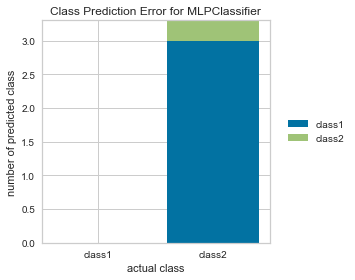

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


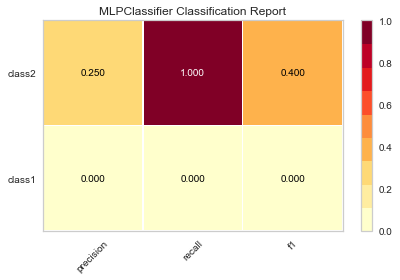

In [46]:
from random import randint
from yellowbrick.classifier import ClassPredictionError, ClassificationReport

# Function to predict labels for given test set and print classification report of precision, recall and F1
def find_avg_goodness(model, test_features, test_labels, class_diff_dict):
    predictions = model.predict(test_features)
    sum = 0
    for i in range(len(predictions)):
        sum += goodness(predictions[i], test_labels[i], class_diff_dict[i])
    
    print(sum / len(predictions))
#     print(classification_report(test_labels, predictions, target_names=target_name))
    
# Function to produce visualization of class prediction
def predict_class_error(best_params, training_features, training_labels, test_features, test_labels, class_labels):
    model = get_model(best_params)
    visualizer = ClassPredictionError(model, classes=class_labels)
    visualizer.fit(training_features, training_labels)
    visualizer.score(test_features, test_labels)
    g = visualizer.poof()
    
# Function to produce visualization of metrics
def predict_metrics(best_params, training_features, training_labels, test_features, test_labels, class_labels):
    model = get_model(best_params)
    visualizer = ClassificationReport(model, classes=class_labels)
    visualizer.fit(training_features, training_labels)
    visualizer.score(test_features, test_labels)
    g = visualizer.poof()
        
# Function to provide baseline metrics (with no neural network) based on random assignment of class
def produce_random_classification(test_features, test_labels, max_classes):
    random_predictions = []
    for sample in test_features:
        random_predictions.append(randint(1, max_classes))
    print(classification_report(test_labels, random_predictions))
    
# Function to define metric for model accuracy
def goodness(predicted, actual, range_size):
    return float((predicted - actual)) / float(range_size)

# (3) Split training data into training/test set, use test set to return precision, recall, and f1 scores (?)
test_age_features = [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
test_age_labels = [1, 1, 1, 2]
scaled_test_age_features = scale(scaler, test_age_features)
predict_class_error(best_age_params, scaled_age_features, age_labels, 
                    scaled_test_age_features, test_age_labels, ["class1", "class2"])
predict_metrics(best_age_params, scaled_age_features, age_labels, 
                    scaled_test_age_features, test_age_labels, ["class1", "class2"])
# produce_random_classification(scaled_test_age_features, test_age_labels, 6)
# predict_values(trained_age_model, scaled_test_age_features, test_age_labels)

test_tp_features = [[6, 7, 8, 9, 10]]
test_tp_labels = [2]
scaled_test_tp_features = scale(scaler, test_tp_features)
# produce_random_classification(scaled_test_tp_features, test_tp_labels, 13)
# predict_values(trained_tp_model, scaled_test_tp_features, test_tp_labels)

### Prediction

In [ ]:
# (4) Use trained models to predict age and time period of selected authors/novels
test_age_features = [[1, 2, 3, 4, 5]]
test_age_labels = [1]
scaled_test_age_features = scale(scaler, test_age_features)

test_tp_features = [[6, 7, 8, 9, 10]]
test_tp_labels = [2]
scaled_test_tp_features = scale(scaler, test_tp_features)